In [1]:
# Imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import pearsonr 

aDFLast20yr = pd.read_csv("aDFLast20yr.csv")
aDFNext20yr = pd.read_csv("aDFNext20yr.csv")
MercuryLast50yr = pd.read_csv("MercuryLast50yr.csv")
VenusLast50yr = pd.read_csv("VenusLast50yr.csv")
EarthLast50yr = pd.read_csv("EarthLast50yr.csv")
MarsLast50yr = pd.read_csv("MarsLast50yr.csv")

In [2]:
#Defining Functions
def CleanData(df):
    #Renaming
    df = df.rename(columns={"des":"Name", "orbit_id":"Orbit ID", "cd":"Date", "dist":"Nominal Distance", "t_sigma_f": "Date Uncertainty","v_rel":"Relative Speed", "body":"Planet"})
    #Creating specific Date Columns
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'], df['Month'], df['Day'] = df['Date'].dt.year, df['Date'].dt.month, df['Date'].dt.day
    #Removing Dates with high uncertainty
    df['Date Uncertainty'] = df['Date Uncertainty'].replace({':':'', '_':'','<':'','>':''}, regex=True)
    df['Date Uncertainty'] = pd.to_numeric(df['Date Uncertainty'])
    df = df[df['Date Uncertainty'] < 50000]
    return df

def TotCntByPlanetType(df):
    df = CleanData(df)
    df = df.drop(columns=['Name', 'Orbit ID', 'jd', 'Date', 'Nominal Distance','dist_min', 'dist_max', 'Relative Speed', 'v_inf', 'Date Uncertainty', 'h', 'fullname', 'Year', 'Month', 'Day'])
    df = df["Planet"].value_counts().rename_axis('Planets').to_frame('Occurrences')
    #Type
    df.loc[(df.index == "Mercury")|(df.index == "Venus")|(df.index == "Earth")|(df.index == "Mars"), 'Planet Type'] = "Inner"
    df.loc[(df.index == "Jupiter")|(df.index == "Saturn")|(df.index == "Uranus")|(df.index == "Neptune"), 'Planet Type'] = "Outer"
    return df
def TotCntByPlanet(df):
    df = CleanData(df)
    df = df.drop(columns=['Name', 'Orbit ID', 'jd', 'Date', 'Nominal Distance','dist_min', 'dist_max', 'Relative Speed', 'v_inf', 'Date Uncertainty', 'h', 'fullname', 'Year', 'Month', 'Day'])
    df = df["Planet"].value_counts().rename_axis('Planets').to_frame('Occurrences')
    return df
def graphbyPlanet(df, title, imageName):
    Graphdf = TotCntByPlanet(df)
    Graphdf = Graphdf[~Graphdf.index.isin(['Moon','Jupiter','Saturn','Uranus','Neptune'])]

    #Graphing with PyPlot
    plt.bar(Graphdf.index, Graphdf['Occurrences'], width=.5, color='green')
    #Labels
    plt.title("Close Approaches Recorded by Planet within 30 lunar distances")
    plt.xlabel("Planets")
    plt.ylabel("Count")
    #Style Ticks
    xVal = np.arange(len(Graphdf.index))
    plt.xticks(xVal, rotation=45, ha='right')
    #Style Graph
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')
    ax.grid(axis='y')
    ax.set_ylim([0,max(Graphdf['Occurrences']+1000)])
    ax.figure.savefig(f'Images/{imageName}.png')
    
def graphbyPlanetCompare(df1, df2, title, imageName):
    df1 = TotCntByPlanet(df1)
    df2 = TotCntByPlanet(df2)
    Graphdf = df1.merge(df2, how='outer', on='Planets')
    Graphdf = Graphdf.rename(columns={"Occurrences_x":"Previous Occurrences", "Occurrences_y":"Upcoming Occurrences"})
    Graphdf = Graphdf[~Graphdf.index.isin(['Moon','Jupiter','Saturn','Uranus','Neptune'])]
    #Graphing with PyPlot
    Graphdf.plot(kind='bar')
    #Labels
    plt.title(title)
    plt.xlabel("Planets")
    plt.ylabel("Count")
    #Style Ticks
    xVal = np.arange(len(Graphdf.index))
    plt.xticks(xVal, rotation=45, ha='right')
    #Style Graph
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')
    ax.grid(axis='y')
    ax.set_ylim([0,max(Graphdf['Previous Occurrences']+1000)])
    ax.figure.savefig(f'Images/{imageName}.png')
    
def graphbyPlanetType(df, title, imageName):
    Graphdf=TotCntByPlanetType(df)
    Graphdf = Graphdf[~Graphdf.index.isin(['Moon'])]
    Graphdf = pd.DataFrame(Graphdf.groupby('Planet Type')['Occurrences'].sum().rename_axis('Planets').to_frame('Occurrences'))

    #Graphing with PyPlot
    plt.bar(Graphdf.index, Graphdf['Occurrences'], width=.5, color='green')
    #Labels
    plt.title(title)
    plt.xlabel("Planets")
    plt.ylabel("Count")
    #Style Ticks
    xVal = np.arange(len(Graphdf.index))
    plt.xticks(xVal, rotation=45, ha='right')
    #Style Graph
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')
    ax.grid(axis='y')
    ax.set_ylim([0,max(Graphdf['Occurrences']+1000)])
    ax.figure.savefig(f'Images/{imageName}.png')
def PlanetOcc(df, title, imageName):
    #Clean
    Graphdf=CleanData(df)
    Graphdf = Graphdf.drop(columns=['Name', 'Orbit ID', 'jd', 'Date', 'Nominal Distance','dist_min', 'dist_max', 'Relative Speed', 'v_inf', 'Date Uncertainty', 'h', 'fullname', 'Day'])
    #Graphdf = Graphdf.loc[(Graphdf['Planet'] == "Mercury")]
    #Sort for graph
    Graphdf['sorter'] = Graphdf['Year'].map(str)
    Graphdf['Year'] = pd.to_datetime(Graphdf['Year'], format='%Y').dt.strftime('%Y')
    Graphdf = Graphdf.groupby('Year')['sorter'].value_counts().to_frame('Occurrences')
    Graphdf.reset_index(inplace=True)
    Graphdf = Graphdf.sort_values("sorter", ascending=True)
    #Graph
    fig, ax = plt.subplots()
    plt.plot_date(Graphdf['Year'], Graphdf['Occurrences'], marker='o',color='green')
    plt.title(title)
    plt.xlabel("Years")
    plt.ylabel("Occurances")
    #Style Ticks
    xVal = np.arange(len(Graphdf.index))
    plt.xticks(xVal, rotation=45, ha='right')
    #Style Graph
    ax = plt.gca()
    ax.figure.set_size_inches(20, 7)
    ax.set_facecolor('xkcd:black')
    ax.grid(axis='y')
    ax.set_ylim([0,max(Graphdf['Occurrences']+5)])
    #linear Regression
    s, yint, r_value, p_value, std_err = stats.linregress(xVal, Graphdf['Occurrences'])
    regvals = xVal * s + yint
    linRegL = "y = " + str(round(s,2)) + "x +" + str(round(yint,2))
    line1, = plt.plot(xVal,regvals,"white", label=f'LR: {linRegL}', linewidth=3)
    plt.legend(handles=[line1], loc="lower right")
    ax.figure.savefig(f'Images/{imageName}.png')
    print("\033[1mP Value\033[0m: %f" % p_value)
    print("\033[1mCorrelation Coefficient\033[0m: %f" % r_value**2)
    print("\033[1mLinear Regression Line\033[0m: y = " + str(round(s,2)) + "x + " + str(round(yint,2)))
def CleanDfANOVA(df, planet):
    df=CleanData(df)
    df = df.drop(columns=['Name', 'Orbit ID', 'jd', 'Date', 'Nominal Distance','dist_min', 'dist_max', 'Relative Speed', 'v_inf', 'Date Uncertainty', 'h', 'fullname', 'Day'])
    df['sorter'] = df['Year'].map(str)
    df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.strftime('%Y')
    df = df.groupby('Year')['sorter'].value_counts().to_frame('Occurrences')
    df.reset_index(inplace=True)
    df = df.sort_values("sorter", ascending=True)
    df['Planet'] = f'{planet}'
    return df
def CombinePlanetDFsANOVA(df1, name1, df2, name2, df3, name3, df4, name4):
    df1 = CleanDfANOVA(df1, f'{name1}')
    df2 = CleanDfANOVA(df2, f'{name2}')
    df3 = CleanDfANOVA(df3, f'{name3}')
    df4 = CleanDfANOVA(df4, f'{name4}')
    dfc1 = df1.merge(df2, how='outer')
    dfc2 = df3.merge(df4, how='outer')
    dfcf = dfc1.merge(dfc2, how='outer')
    return dfcf

def BoxPlotANOVA(CDF, imageName):
    flierprops = dict(marker='o', markerfacecolor='white', markersize=6, linestyle='none', markeredgecolor='white')
    ax = CDF.boxplot("Occurrences", by="Planet", color=dict(boxes='green', whiskers='green', medians='green', caps='green'),showfliers=True, grid=False, rot=0, flierprops=flierprops)
    ax.set_title('')
    ax.set_xlabel('Occurances')
    ax.set_ylabel('Planet')
    ax.set_facecolor('xkcd:black')
    ax.grid(axis='y')
    plt.show()
    ax.figure.savefig(f'Images/{imageName}.png')
def PlanetOcc1(df, title, imageName):
    #Clean
    Graphdf=CleanData(df)
    Graphdf = Graphdf.drop(columns=['Name', 'Orbit ID', 'jd', 'Date', 'Nominal Distance','dist_min', 'dist_max', 'Relative Speed', 'v_inf', 'Date Uncertainty', 'h', 'fullname', 'Day'])
    #Graphdf = Graphdf.loc[(Graphdf['Planet'] == "Mercury")]
    #Sort for graph
    Graphdf['sorter'] = Graphdf['Year'].map(str)
    Graphdf['Year'] = pd.to_datetime(Graphdf['Year'], format='%Y').dt.strftime('%Y')
    Graphdf = Graphdf.groupby('Year')['sorter'].value_counts().to_frame('Occurrences')
    Graphdf.reset_index(inplace=True)
    Graphdf = Graphdf.sort_values("sorter", ascending=True)
    #Graph
    fig, ax = plt.subplots()
    plt.plot_date(Graphdf['Year'], Graphdf['Occurrences'], marker='o',color='green')
    plt.title(title)
    plt.xlabel("Years")
    plt.ylabel("Occurances")
    #Style Ticks
    xVal = np.arange(len(Graphdf.index))
    plt.xticks(xVal, rotation=45, ha='right')
    #Style Graph
    ax = plt.gca()
    ax.figure.set_size_inches(20, 7)
    ax.set_facecolor('xkcd:black')
    ax.grid(axis='y')
    ax.set_ylim([0,max(Graphdf['Occurrences']+5)])
    #linear Regression
    list2=[]
    list1 = np.arange(len(Graphdf.index))
    for val in list1:
        list2.append(val+1)
    log_x_data = np.log(list2)
    log_y_data = np.log(Graphdf['Occurrences'])
    list5=[]
    for val in list2:
        list5.append(val-1)
    curve_fit = np.polyfit(list5, log_y_data, 1)
    print(curve_fit)
    y = np.exp(3.60) * np.exp(0.055*np.asarray(list5))
    plt.plot(list5, y)
    list3=list(Graphdf['Occurrences'])
    corr, _ = pearsonr(list5, list3)
    ax.figure.savefig(f'Images/{imageName}.png')
    print(f"\033[1mP Value\033[0m: {corr}")
    print("\033[1mCorrelation Coefficient\033[0m: 0.74290841%f")    


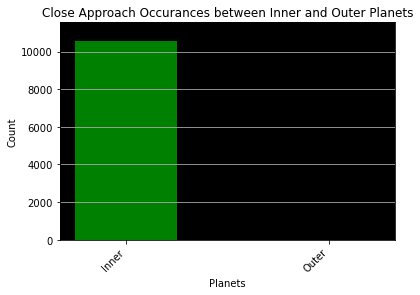

In [3]:
#Outer Planets Negligible
graphbyPlanetType(aDFLast20yr, "Close Approach Occurances between Inner and Outer Planets", "CpTypeAll")

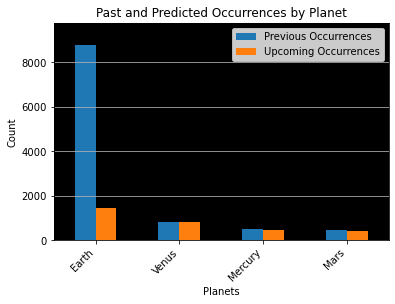

In [4]:
graphbyPlanetCompare(aDFLast20yr, aDFNext20yr, 'Past and Predicted Occurrences by Planet', 'PandPOccbyPlan')

In [5]:
df1 = TotCntByPlanet(aDFLast20yr)
df2 = TotCntByPlanet(aDFNext20yr)
Graphdf = df1.merge(df2, how='outer', on='Planets')
Graphdf = Graphdf.rename(columns={"Occurrences_x":"Previous Occurrences", "Occurrences_y":"Upcoming Occurrences"})
Graphdf = Graphdf[~Graphdf.index.isin(['Moon', 'Jupiter','Saturn','Uranus','Neptune'])]
Graphdf

,Previous Occurrences,Upcoming Occurrences
Planets,,
Earth,8778,1446.0
Venus,824,833.0
Mercury,479,472.0
Mars,471,408.0


P Value: 0.070729
Correlation Coefficient: 0.065116
Linear Regression Line: y = 0.08x + 19.12


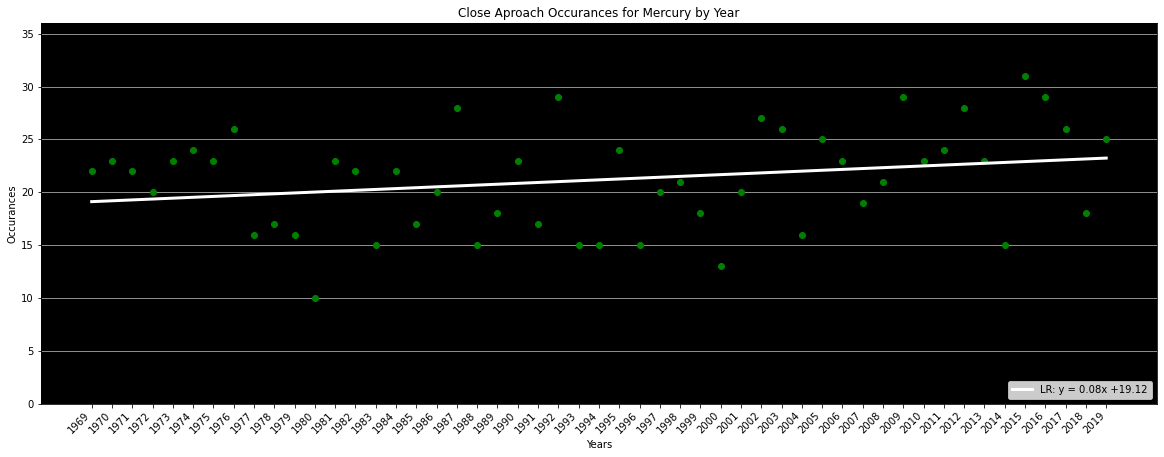

In [6]:
PlanetOcc(MercuryLast50yr,'Close Aproach Occurances for Mercury by Year','Merc50')

P Value: 0.000970
Correlation Coefficient: 0.200959
Linear Regression Line: y = 0.21x + 30.85


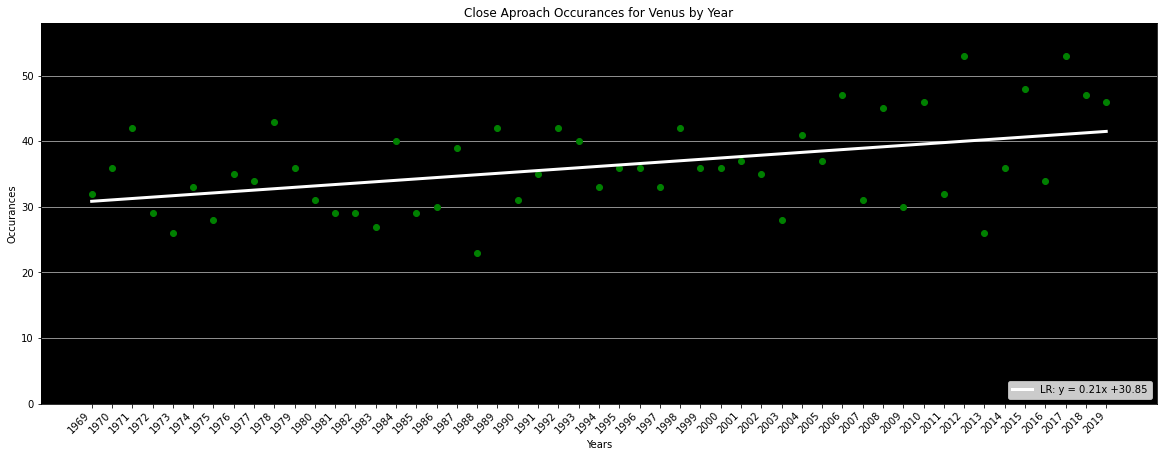

In [7]:
PlanetOcc(VenusLast50yr,'Close Aproach Occurances for Venus by Year','Venus50')

P Value: 0.000000
Correlation Coefficient: 0.551913
Linear Regression Line: y = 13.06x + -112.64


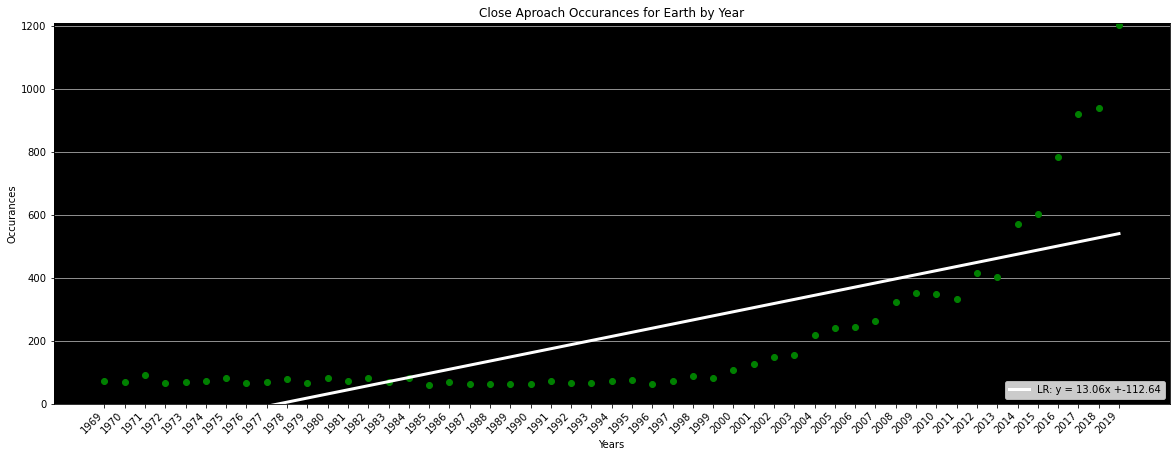

In [8]:
PlanetOcc(EarthLast50yr,'Close Aproach Occurances for Earth by Year','Earth50')

[0.0512747  3.60167034]
P Value: 0.7429084127188472
Correlation Coefficient: 0.74290841%f


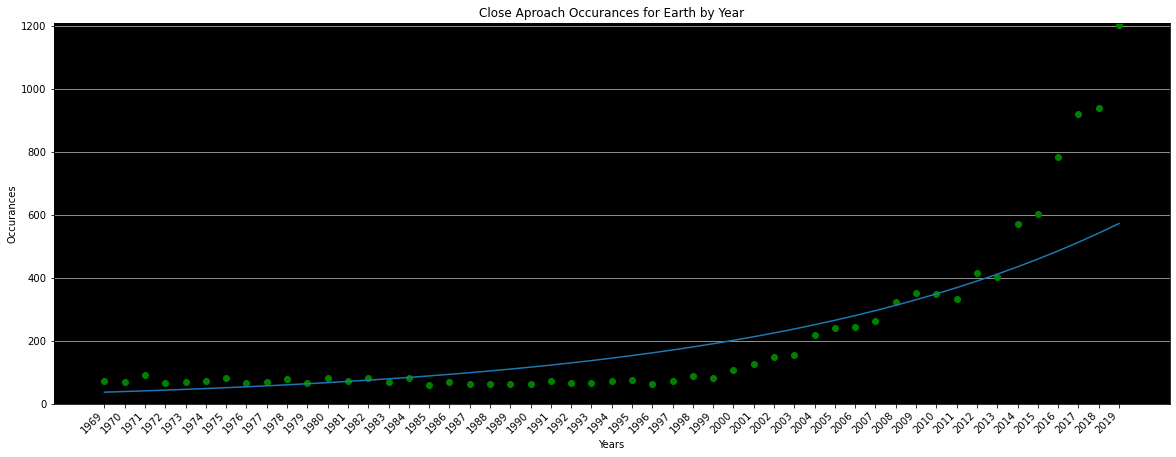

In [9]:
PlanetOcc1(EarthLast50yr,'Close Aproach Occurances for Earth by Year','LogEarth50')

P Value: 0.005003
Correlation Coefficient: 0.149908
Linear Regression Line: y = 0.17x + 15.22


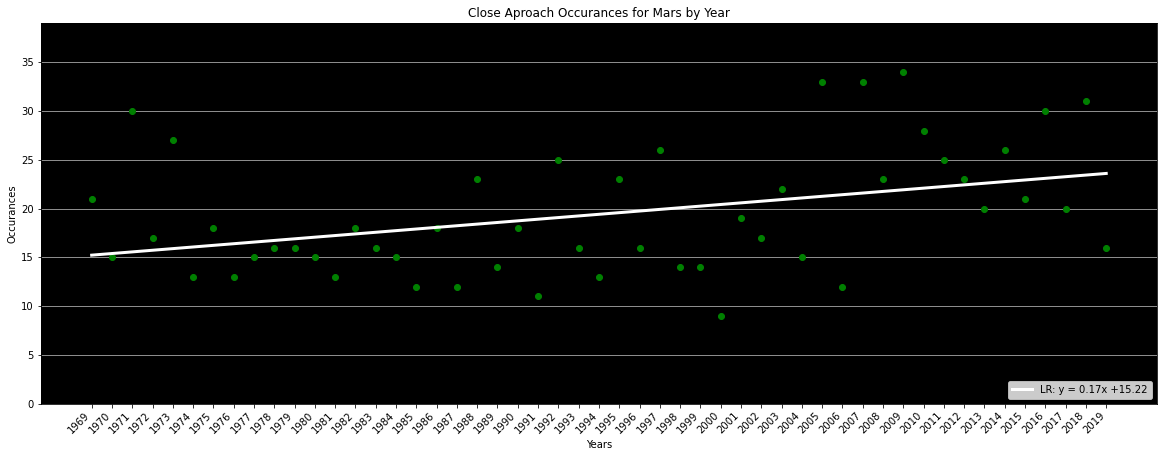

In [10]:
PlanetOcc(MarsLast50yr,'Close Aproach Occurances for Mars by Year','Mars50')

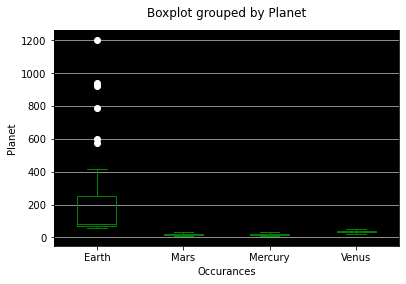

In [11]:
BoxPlot=CombinePlanetDFsANOVA(MercuryLast50yr, "Mercury", VenusLast50yr, "Venus", EarthLast50yr, "Earth", MarsLast50yr, "Mars")
BoxPlotANOVA(BoxPlot, "BoxPlot")

In [17]:
group1 = BoxPlot[BoxPlot["Planet"] == "Mercury"]["Occurrences"]
group2 = BoxPlot[BoxPlot["Planet"] == "Venus"]["Occurrences"]
group3 = BoxPlot[BoxPlot["Planet"] == "Earth"]["Occurrences"]
group4 = BoxPlot[BoxPlot["Planet"] == "Mars"]["Occurrences"]

print('ANOVA Between All Planet Sets')
statAll, pAll = stats.f_oneway(group1, group2, group3, group4)
print(f'F-statistic:{statAll}')
print(f'P-Value:{pAll}')
print("")
print('ANOVA Between Mercury and Venus')
s1, p1 = stats.f_oneway(group1, group2)
print(f'F-statistic:{s1}')
print(f'P-Value:{p1}')
print("")
print('ANOVA Between Mercury and Earth')
s2, p2 = stats.f_oneway(group1, group3)
print(f'F-statistic:{s2}')
print(f'P-Value:{p2}')
print("")
print('ANOVA Between Mercury and Mars')
s3, p3 = stats.f_oneway(group1, group4)
print(f'F-statistic:{s3}')
print(f'P-Value:{p3}')
print("")
print('ANOVA Between Venus and Earth')
s4, p4 = stats.f_oneway(group2, group3)
print(f'F-statistic:{s4}')
print(f'P-Value:{p4}')
print("")
print('ANOVA Between Venus and Mars')
s5, p5 = stats.f_oneway(group2, group4)
print(f'F-statistic:{s5}')
print(f'P-Value:{p5}')
print("")
print('ANOVA Between Earth and Mars')
s6, p6 = stats.f_oneway(group3, group4)
print(f'F-statistic:{s6}')
print(f'P-Value:{p6}')
print("")
print('ANOVA Between Mercury, Earth, and Mars')
s6, p6 = stats.f_oneway(group1,group3, group4)
print(f'F-statistic:{s6}')
print(f'P-Value:{p6}')
print("")
print('ANOVA Between Mercury, Venus, and Mars')
s6, p6 = stats.f_oneway(group1,group2, group4)
print(f'F-statistic:{s6}')
print(f'P-Value:{p6}')
print("")
print('ANOVA Between Mercury, Venus, and Earth')
s6, p6 = stats.f_oneway(group1,group2, group3)
print(f'F-statistic:{s6}')
print(f'P-Value:{p6}')
print("")
print('ANOVA Between Venus, Earth, and Mars')
s6, p6 = stats.f_oneway(group2,group4, group3)
print(f'F-statistic:{s6}')
print(f'P-Value:{p6}')

ANOVA Between All Planet Sets
F-statistic:26.590627288254108
P-Value:1.6199001281312434e-14

ANOVA Between Mercury and Venus
F-statistic:157.242463324198
P-Value:3.075672218315185e-22

ANOVA Between Mercury and Earth
F-statistic:27.711798214278087
P-Value:8.069906642234763e-07

ANOVA Between Mercury and Mars
F-statistic:2.464853021727223
P-Value:0.11957749982413936

ANOVA Between Venus and Earth
F-statistic:23.555528656464432
P-Value:4.478224331645265e-06

ANOVA Between Venus and Mars
F-statistic:157.03946690039183
P-Value:3.2002811568272584e-22

ANOVA Between Earth and Mars
F-statistic:28.214211068244456
P-Value:6.588672957209805e-07

ANOVA Between Mercury, Earth, and Mars
F-statistic:27.951020575072327
P-Value:4.8116667087752095e-11

ANOVA Between Mercury, Venus, and Mars
F-statistic:113.55101242900643
P-Value:9.384898969734689e-31

ANOVA Between Mercury, Venus, and Earth
F-statistic:25.703498329596606
P-Value:2.519143599875092e-10

ANOVA Between Venus, Earth, and Mars
F-statistic:25